In [2]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train = np.expand_dims(x_train, axis=3).astype('float32')

In [6]:
x_train.shape

(60000, 28, 28, 1)

In [7]:
x_test = np.expand_dims(x_test, axis=3).astype('float32')

In [ ]:
x_train /= 255
x_test /= 255

In [8]:
from keras.utils import to_categorical
%matplotlib inline

In [9]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

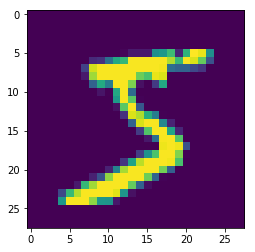

In [10]:
plt.imshow(np.reshape(x_train[0], (28,28)))

In [11]:
np.argmax(y_train[0])

5

In [12]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1),padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 61952)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               7929984   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 8,023,946
Trainable params: 8,023,946
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.15)